# Read In Dataset ([RCV1](http://scikit-learn.org/stable/datasets/rcv1.html))
The RCV1 dataset is included in scikit learn by default.

In [1]:
""" Log Cell """
import time

def ex_time( prev_time , message ):
    """ Prints 'Time to' followed by the provided 
         message and the time since prev_time """
    
    print(f'Time to {message}: {time.time() - prev_time:0.4f} seconds')

In [2]:
""" Get Dataset Cell

    Dependencies:
        • Log Cell """

from sklearn.datasets import fetch_rcv1

def get_rcv1(): 
    """ Returns the RCV1 dataset """
    
    last_time = time.time()

    # Retrieve the dataset
    rcv1 = fetch_rcv1()
    ex_time(last_time, 'fetch')
    return rcv1

In [13]:
rcv1 = get_rcv1()

Time to fetch: 4.4605 seconds


## Dataset Attributes
   1. __data__ - a scipy [compressed row storage (CSR) sparce matrix](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html). Non-zero values are cosinne-normalized, log TF-IDF vectors. The shape is (num_samples, num_features)
   2. __target__ - a scipy CSR sparse matrix. Maps each sample to relavent categories (sometimes refered to as labels). The shape is (num_samples, num_categories).
   3. __sample_id__ - a [numpy n-dimensional array](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.ndarray.html) (ndarray) associating each sample's ID to its sample number
   4. __target_names__ - a ndarray of target names (can be thought of as topics or categories) corresponding to the category mapping in __(2)__. Each sample belongs to n categories, where 1 $\le$ n $\le$ 13.
   5. __description__ - a description of the dataset
   
The shape attribute gives the dimensions of the matrix.

In [5]:
""" RCV1 Attributes Cell

    Dependencies:
        • Get Dataset Cell
        • Trace Cell """

def get_nonzero(matrix):
    """ Returns the percent of items in the provided 
         matrix that are not 0.
         
        Params:
          matrix -- a csr sparse matrix """
    
    last_time = time.time()
    
    nonzero = (matrix.count_nonzero() / (matrix.shape[0] * matrix.shape[1])) * 100
    # Check value is valid
    assert nonzero <= 100
    assert nonzero >= 0
    
    last_time = ex_time(last_time, 'calc nonzero')
    return nonzero

def print_dataset_attributes(dataset):
    """ Prints attributes of the provided dataset.
    
        Params:
          dataset -- the RCV1 full dataset or a subset """
    
    print ('data:')
    print(f'      shape: {dataset.data.shape}')
    print(f'  data type: {dataset.data.dtype}')
    print(f' array type: {type(dataset.data)}')
    print(f'    nonzero: {get_nonzero(dataset.data):0.4f}%\n')

    print('target:')
    print(f'      shape: {dataset.target.shape}')
    print(f'  data type: {dataset.target.dtype}')
    print(f' array type: {type(dataset.target)}')
    print(f'    nonzero: {get_nonzero(dataset.target):0.4f}%\n')

    print('sample_id:')
    print(f'      shape: {dataset.sample_id.shape}')
    print(f'  data type: {type(dataset.sample_id[3])}')
    print(f' array type: {type(dataset.sample_id)}\n')

    print('target_names:')
    print(f'      shape: {dataset.target_names.shape}')
    print(f'  data type: {type(dataset.target_names[3])}')
    print(f' array type: {type(dataset.target_names)}')

In [4]:
print_dataset_attributes(rcv1)

data:
      shape: (804414, 47236)
  data type: float64
 array type: <class 'scipy.sparse.csr.csr_matrix'>
Time to calc nonzero: 0.2425 seconds
    nonzero: 0.1603%

target:
      shape: (804414, 103)
  data type: uint8
 array type: <class 'scipy.sparse.csr.csr_matrix'>
Time to calc nonzero: 0.0101 seconds
    nonzero: 3.1463%

sample_id:
      shape: (804414,)
  data type: <class 'numpy.uint32'>
 array type: <class 'numpy.ndarray'>

target_names:
      shape: (103,)
  data type: <class 'str'>
 array type: <class 'numpy.ndarray'>


# Document Classification
## [Naive Bayes](http://scikit-learn.org/stable/modules/naive_bayes.html)
A supervise learning algorithm based on using Bayes' theorem. This method assumes independence between each pair of features.

Bayes Theorem:
\begin{equation}
P(y | x_1, . . ., x_n) = \frac{P(y) P(x_1, . . ., x_n | y)} {P(x_1, . . ., x_n)} \hspace{3.6cm} (1)
\end{equation}

This can be further simplified by using the assumption that each pair of features is independent, shown in eq 2.1. Then since $P(x_1, ..., x_n) $ is constant with respect to each input we can use the proportionlity in eq 2.2.

\begin{align}
P(y | x_1, . . ., x_n) &= \frac{P(y) \prod_{i = 1}^{n} P(x_1, . . ., x_n | y)} {P(x_1, . . ., x_n)} \hspace{3cm}(2.1)\\
                 &\propto P(y) \prod_{i = 1}^{n} P(x_1, . . ., x_n | y)   \hspace{3.5cm}(2.2)
\end{align}

This gives us our classification rule, shown in eq 3.

\begin{equation}
\hat{y} = arg \max_y P(y) \prod_{i=1}^{n} P(x_i | y) \hspace{5.4cm} (3)
\end{equation}

SciKit Learn supports several Naive Bayes implimentations. 
1. __Gaussian Naive Bayes__ - In this implementation the likelihood of the features is assumed to be Gaussian. Gussian distributions are more commonly reffered to as the normal distribution or bell curve. This class does not support sparse matricies.
2. __Multinomial Naive Bayes__ - In this implementation the likelihood of the features is assumed to follow a multinomial distribution. Typically used in text classification. This class does support sparse matricies.
3. __Bernoulli Naive Bayes__ - This implimentaiton assumes the data follows multivariate Bernoulli distributions. Multiple features are allowed but each one is assumed to be a binary variable.

Because of these restrictions only Multinomial Naive Bayes will be appropriate for the RCV1 dataset. There is an additional step required because Naive Bayes does not typically predict multilple labels. This means an additional strategy must be implemented. One commonly used startegy is known as one-vs-all ([one-vs-the-rest](http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier) in scikit learn). This strategy works by using one classifier for each label.

In [8]:
""" Fit Classifier Cell 

    Dependencies:
        • Trace Cell """

from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

def make_fit_NB(data, target, num_jobs=-1):
    """ Initializes a MultinomialNB classifier with a 
         OneVsRestClassifier wrapper to enable multioutput
         
        Params:
          data -- a [num_samples, num_features] matrix
          target --  a [num_samples, num_labels] matrix
          num_jobs -- number of CPUs to use for calculation
                       default = -1 (ie all CPUs)"""
    
    last_time = time.time()
    
    # Initialize classifier
    classifier = OneVsRestClassifier(MultinomialNB(), n_jobs=num_jobs)

    # Train classifier
    classifier.fit(data, target)
    ex_time(last_time, 'train')
    return classifier


In [9]:
mult_NB_clf = make_fit_NB(rcv1_train.data, rcv1_train.target)

/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 49 is present in all training examples.
  str(classes[c]))
/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 80 is present in all training examples.
  str(classes[c]))


Time to train: 2.1272 seconds


In [10]:
pred = predict_clf(mult_NB_clf, rcv1_test.data)

Time to predict: 33.1957 seconds


## Scoring
When testing a machine learning algorithm it is difficult to determine how a classifier performs by hand, so several metrics are commonly used to evaluate their performance.

1. __accuracy__ - The percentage of labels predicted correctly.
+ __precision__ - The ratio of true positives to true positives and false positives.
+ __recall__ - The ratio of true positives to true positives and false negatives.
+ __average precision__ - The weighted mean of the precision achieved at eaach recall threshold.

The term 'micro' average reffers to calculating the average of each label weighted with respect to how frequently they occur. This is most appropriate for the RCV1 dataset because the labels do not occur with the same frequency. Information on additional averaging methods can be found [here](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score). 

In [4]:
""" Scoring Methods Cell
    
    Dependencies: 
        • Trace Cell """

# For scoring methods
from sklearn.metrics import accuracy_score, average_precision_score, f1_score, precision_score, recall_score

def predict_clf(clf, data):
    """ Returns the predicted classification of the provided 
         samples using the provided classifier
        
        Params:
          clf -- the classifier to use
          data -- a matrix of samples and features to use for prediction """
    
    last_time = time.time()

    # Generate prediction on test data
    prediction = clf.predict(data)
    ex_time(last_time, 'predict')

    return prediction

def get_scores(target, prediction):
    """ Return the accuracy, f1, average precision, recall, 
         and precision of the provided prediction
        
        Params:
          target -- a [num_samples, num_labels] matrix of the correct classificiation samples
          prediction -- a [num_samples, num_labels] matrix of predicted classifications
        
        Returns a list of scores with the order:
         [accuracy, f1, average precision, recall, precision]. """
    
    scores = [accuracy_score(target, prediction)]
    scores += [f1_score(target, prediction, average='micro')]
    scores += [average_precision_score(target.toarray(), prediction.toarray(), average="micro")]
    scores += [recall_score(target, prediction, average='micro')]
    scores += [precision_score(target, prediction, average='micro' )]
    return scores

def print_scores(scores):
    """ Prints the provided accuracy, f1, average precision, recall, 
         and precision scores
         
        Params:
          scores -- a list of scores with the order
                     [accuracy, f1, average precision, recall, precision]"""
    
    print(f'Accuracy: {scores[0]:0.4f}')
    print(f'Micro-averaged F1: {scores[1]:0.4f}')
    print(f'Average precision score, micro-averaged over all classes: {scores[2]:0.4f}')
    print(f'Micro averaged recall: {scores[3]:0.4f}')
    print(f'Micro averaged precision: {scores[4]:0.4f}')

## [K-Folds Cross-Validation](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)

To remove bias from a train/test split it is common practice to use K-Folds cross-validation, typically k = 10. This splits the dataset into k segments. With these k segments k - 1 are used to train a classifier while the last one is used to test. This is repeated until all k segments have been used as the testing segment. 

In [3]:
""" kFold Cell
    
    Dependencies:
        • Scoring Methods Cell 
        • Trace Cell """

# For train/test split
from sklearn.model_selection import KFold

def k_fold_and_score_NB(make_fit_func, data, target, k):
    """ Returns the average scores over k folds.
    
        Params:
          make_fit_func -- a function that takes (data, target) as paramaters
                            and returns a trained classifier
          data -- a [num_samples, num_features] matrix
          target --  a [num_samples, num_labels] matrix
          k -- the number of folds to make """
    
    total_time = time.time()
    # Initialize train/test split
    kf = KFold(n_splits=k)

    total_scores = [0] * 5
    # Iterate over each train/test split
    for train_index, test_index in kf.split(rcv1.data):
        X_train = rcv1.data[train_index]
        X_test = rcv1.data[test_index]
        y_train = rcv1.target[train_index]
        y_test = rcv1.target[test_index]

        # Train classifier
        split_clf = make_fit_func(X_train, y_train)

        # Generate prediction on test data
        prediction = predict_clf(split_clf, X_test)

        scores = get_scores(y_test, prediction)
        total_scores = list(map(sum, zip(scores, total_scores)))

    avg_scores = list(map(lambda x: x / k, total_scores))
    for score in avg_score:
        assert score >= 0.0
        assert score <= 1.0

    print_scores(avg_scores)
    ex_time(total_time, f'train and score {k} folds')
    return avg_scores

In [ ]:
k_fold_and_score_NB(make_fit_NB, rcv1.data, rcv1.target, 10)

## [Support Vector Machines (SVM)](http://scikit-learn.org/stable/modules/svm.html)

A supervised learning that works by seperating the samples into categories seperated by a hyperplane, or set of hyperplanes. Since the hyperplane that that seperates them is not typically unique SVM finds the hyperplane with the maximum distance from any of the categories.

SVM use kernel functions to compute the similarity between data points. Some of the most common are:

1. linear
+ polynomial
+ radial basis function (rbf)
+ sigmoid

The kernel used can significantly impact the accuracy of a classifier. More information on kernels is provided [here](http://scikit-learn.org/stable/modules/metrics.html).

Support Vector Machines do not scale well to large datasets because of this additional strategies needed to be implemented to make the RCV1 dataset work. Since RCV1 requires multiple outputs the one-vs-all strategy needed to be implemented. Next a linear kernel was applied, this reduces complexity and memory usage when compared to some of the more complex kernels. The last method used is an ensamble method, specifically the [BaggingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html). This fits classifiers to random subsets of the origional dataset and combines their predictions. 

Additional information on [SVM](http://dx.doi.org/10.1038/nbt1206-1565 ).

In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import BaggingClassifier

def make_fit_SVM(data, target, num_jobs=-1):
    """ Initializes a SVM classifier with a OneVsRestClassifier
         wrapper to enable multioutput, a linear kerneal, and a 
         BaggingClassifier to reduce computation time.

    Params:
      data -- a [num_samples, num_features] matrix
      target --  a [num_samples, num_labels] matrix
      num_jobs -- number of CPUs to use for calculation
                   default = -1 (ie all CPUs)"""
    
    last_time = time.time()
    
    # Initialize classifier  
    classifier = OneVsRestClassifier(BaggingClassifier(LinearSVC()), n_jobs=-1)
    
    # Train classifier
    classifier.fit(data, target)
    ex_time(last_time, 'train')
    return classifier

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Example provided by http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py
def plot_decision(classifier, X_test, Y_test):
    """ Returns the confidence score of the provided classifier predicting
         the testing values
        
        Params:
          classifier -- the classifier to use to perform the predictions
          X_test -- a [num_samples, num_features] matrix of test data
          Y_test --  a [num_samples, num_labels] matrix of correct classifications """
    
    last_time = time.time()
    y_score = classifier.decision_function(X_test)
    ex_time(last_time, 'calc decision_function')
    
    Y_test_arr = Y_test.toarray()
    
    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(len(Y_test.shape[1])):
        precision[i], recall[i], _ = precision_recall_curve(Y_test_arr[:, i], y_score[:, i])
        average_precision[i] = average_precision_score(Y_test_arr[:, i], y_score[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test_arr.ravel(), y_score.ravel())
    average_precision["micro"] = average_precision_score(Y_test_arr, y_score, average="micro")
    print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))
    plt.figure()
    plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,where='post')
    plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2,color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision["micro"]))
    plt.show()
    
    return y_score

In [5]:
from sklearn.datasets import fetch_rcv1

def rcv1_train_test():
    """ Returns a tuple consisting of the rcv1 train and test subsets. """
    last_time = time.time()
    rcv1_train = fetch_rcv1(subset='train')
    rcv1_test = fetch_rcv1(subset='test')
    return  (rcv1_train, rcv1_test)

In [6]:
rcv1_train, rcv1_test = rcv1_train_test()

In [5]:
last_time = time.time()
print('rcv1 training subset attributes:')
print_dataset_attributes(rcv1_train)
print('\nrcv1 testing subset attributes:')
print_dataset_attributes(rcv1_test)

print()
ex_time(last_time, 'rcv1 test and train attributes')

rcv1 training subset attributes:
data:
      shape: (23149, 47236)
  data type: float64
 array type: <class 'scipy.sparse.csr.csr_matrix'>
Time to calc nonzero: 0.0070 seconds
    nonzero: 0.1608%

target:
      shape: (23149, 103)
  data type: uint8
 array type: <class 'scipy.sparse.csr.csr_matrix'>
Time to calc nonzero: 0.0003 seconds
    nonzero: 3.0909%

sample_id:
      shape: (23149,)
  data type: <class 'numpy.uint32'>
 array type: <class 'numpy.ndarray'>

target_names:
      shape: (103,)
  data type: <class 'str'>
 array type: <class 'numpy.ndarray'>

rcv1 testing subset attributes:
data:
      shape: (781265, 47236)
  data type: float64
 array type: <class 'scipy.sparse.csr.csr_matrix'>
Time to calc nonzero: 0.2314 seconds
    nonzero: 0.1603%

target:
      shape: (781265, 103)
  data type: uint8
 array type: <class 'scipy.sparse.csr.csr_matrix'>
Time to calc nonzero: 0.0097 seconds
    nonzero: 3.1480%

sample_id:
      shape: (781265,)
  data type: <class 'numpy.uint32'>
 

In [5]:
SVM_clf = make_fit_SVM(rcv1_train.data, rcv1_train.target)

/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 49 is present in all training examples.
  str(classes[c]))
/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 80 is present in all training examples.
  str(classes[c]))


Time to train: 52.0410 seconds


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:444: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


Average precision score, micro-averaged over all classes: 0.82


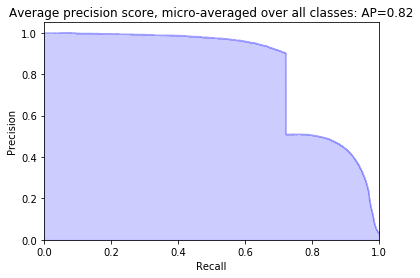

Time to score SVM: 14.8430 seconds


In [22]:
# Predict using every 100th document to reduce size for testing
SVM_score = score_SVM(SVM_clf, rcv1_test.data[::100], rcv1_test.target[::100])

In [8]:
# Predict using every testing document
last_time = time.time()
pred_SVM = SVM_clf.decision_function(rcv1_test.data)
ex_time(last_time, 'predict SVM')

Time to predict SVM: 2105.3753 seconds


Average precision score, micro-averaged over all classes: 0.82


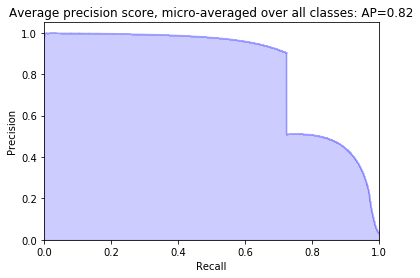

Time to score SVM: 326.4536 seconds


In [12]:
score_SVM(SVM_clf, rcv1_test.data,rcv1_test.target)

## [k-Nearest Neighbors (kNN)](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.fit)

This algorithm is not trained like the previous machine learning algorithms. Nearest Neighbors is an instance-based learning algorithm, meaning it simply scores the training data instead of making a general model. It works by calculating the distance from a query point to all other points in the training set, and the top k closest points are returned. This can be very computationally demanding so an additional algorithm is typically implemented to help calculate distance. The two most frequently used algorithms are kd-tree and BallTree. Both are considerably faster than calculating neighbors with brute force, and BallTree performs especially well in high dimensions. 

Additionally the [distince metric](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html) can be tailored to the dataset. Let $n$ be the number of dimensions in $\vec{x}$, and let $x_i$ represent the $i^{\text{th}}$ dimension of $\vec{x}$.

* Euclidean 
\begin{equation*}
dist(\vec{x}, \vec{y}) = \sum_{i=1}^n (x_i - y_i)^2
\end{equation*}
* Manhattan
\begin{equation*}
dist(\vec{x}, \vec{y}) = \sum_{i=1}^n \mid x_i - y_i \mid
\end{equation*}
* Chebyshev
\begin{equation*}
dist(\vec{x}, \vec{y}) = \max_{i \in [1, n]} ( \mid x_i - y_i \mid )
\end{equation*}
* Minkowski
\begin{equation*}
dist(\vec{x}, \vec{y}) = ( \sum_{i=1}^n \mid x_i - y_i \mid^p )^{1/p}
\end{equation*}

Notice Minowski distance is a generalized form of the other distance formulas. When $p = 1$ it is the same as Manhattan distance, when $p = \infty$ it is the same as Chebyshev distance, and when $p = 2$ it is the same as Euclidean distance. The value for $p$ can be any real number.

In [14]:
from sklearn.neighbors import KNeighborsClassifier

def make_fit_KNN(data, target):
    """ Retursn a KNeighborsClassifier that is trained with
         the provided samples.

    Params:
      data -- a [num_samples, num_features] matrix
      target --  a [num_samples, num_labels] matrix
      num_jobs -- number of CPUs to use for calculation
                   default = -1 (ie all CPUs)"""
    
    last_time = time.time()
    clf = KNeighborsClassifier()
    clf.fit(data,target)
    ex_time(last_time, 'train kNN')
    return clf

In [15]:
kNN_clf = make_fit_KNN(rcv1_train.data, rcv1_train.target)

Time to train kNN: 0.1033 seconds


In [ ]:
kNN_pred = predict_clf(kNN_clf, rcv1_test.data)

# Misc Notes

## 10-Fold SVM on RCV1 is not feasible
* When performing 10-fold CV using SVM on RCV1, used 30+Gb of ram, and system crashed after 10 minutes. 
* Using rcv1 default train/test split classification is relatively fast but prediction on full testing set took 35 minutes.
  * Prediction using 1% of testing data takes 15 seconds.

__TODO__: Consider other datasets.

## Markdown

+ [math](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html)
+ [general](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)
